In [1]:
from torchvision import datasets, transforms
import torch.nn as nn
import torch

In [25]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize channels to [-1,1]
])


In [26]:
train_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root="data", train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [27]:
from torch.utils.data import DataLoader

train_dl = DataLoader(dataset=train_data, shuffle=True, batch_size=32)
test_dl = DataLoader(dataset=test_data, batch_size=32)
len(train_dl), len(test_dl)


(1563, 313)

In [28]:
for img, label in train_dl:
    print(img.shape)
    print(label.shape)
    break

class_names = train_data.classes

torch.Size([32, 3, 32, 32])
torch.Size([32])


In [29]:
from tqdm.auto import tqdm

class SimpleModel(nn.Module):
    def __init__(self,  lr=0.1, weight_decay=1e-2):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Flatten(),
            nn.ReLU(),
            nn.Linear(3*32*32,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,10),
            nn.ReLU()
        )
    
        self.loss_fn = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=lr, weight_decay=weight_decay)

    def forward(self, x):
        x = self.layer(x)
        return x
    
    def accuracy_fn(self, y_pred, y_true):
        correct = torch.eq(y_pred, y_true).sum().item()
        return (correct / len(y_pred))*100
    
    def train_data(self, epochs, train_loader):
        for i in tqdm(range(epochs)):
            train_loss = 0
            train_acc = 0
            for img, label in tqdm(train_loader, leave=False):
                self.train()
                self.optimizer.zero_grad()
                y_pred = self(img)
                loss = self.loss_fn(y_pred, label)
                acc = self.accuracy_fn(y_pred.argmax(dim=1), label)
                train_loss += loss
                train_acc += acc

                loss.backward()
                self.optimizer.step()

            train_loss /= len(train_loader)
            train_acc /= len(train_loader)

            print(f"Epoch {i + 1}/{epochs} Accuracy : {train_acc:.4f} Loss : {train_loss:.4f}")

In [30]:
# for img, label in train_dl:
#     print(torch.sum(model(img)[0]))
#     break

# from torchinfo import summary
# summary(model, input_size=(32, 3, 32, 32))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])


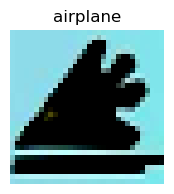

In [31]:
import matplotlib.pyplot as plt

for img, label in train_dl:
    print(img[0].shape)
    plt.figure(figsize=(2,2))
    plt.imshow(img[0].permute(1, 2, 0), interpolation='nearest')
    plt.axis(False)
    plt.title(class_names[label[0]])
    break

In [9]:
model1 = SimpleModel()

model1.train_data(10, train_loader=train_dl)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 1/10 Accuracy : 25.7937 Loss : 2.1541


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 2/10 Accuracy : 28.5889 Loss : 2.0988


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 3/10 Accuracy : 29.5046 Loss : 2.0526


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 4/10 Accuracy : 30.1064 Loss : 2.0356


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 5/10 Accuracy : 30.4243 Loss : 2.0272


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 6/10 Accuracy : 30.5962 Loss : 2.0238


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 7/10 Accuracy : 30.5862 Loss : 2.0206


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 8/10 Accuracy : 30.7362 Loss : 2.0178


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 9/10 Accuracy : 30.8361 Loss : 2.0188


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 10/10 Accuracy : 30.8341 Loss : 2.0161


In [16]:
from tqdm.auto import tqdm

class CNNModel(nn.Module):
    def __init__(self,  lr=0.1, weight_decay=1e-2):
        super().__init__()
        self.layer = nn.Sequential(
           nn.Conv2d(in_channels=3, out_channels=8, stride=1, kernel_size=2, padding=1),
           nn.ReLU(),
           nn.MaxPool2d(kernel_size=2),
           nn.Conv2d(in_channels=8, out_channels=16, stride=1, kernel_size=2, padding=1),
           nn.ReLU(),
           nn.MaxPool2d(kernel_size=2),
           nn.Conv2d(in_channels=16, out_channels=32, stride=1, kernel_size=2, padding=1),
           nn.ReLU(),
           nn.MaxPool2d(kernel_size=2),
           nn.Flatten(),
           nn.Linear(32*4*4, 10),
           nn.ReLU(),
        )
    
        self.loss_fn = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=lr, weight_decay=weight_decay)

    def forward(self, x):
        x = self.layer(x)
        # print(x.shape)
        return x
    
    def accuracy_fn(self, y_pred, y_true):
        correct = torch.eq(y_pred, y_true).sum().item()
        return (correct / len(y_pred))*100
    
    def train_data(self, epochs, train_loader):
        for i in tqdm(range(epochs)):
            train_loss = 0
            train_acc = 0
            for img, label in tqdm(train_loader, leave=False):
                self.train()
                self.optimizer.zero_grad()
                y_pred = self(img)
                loss = self.loss_fn(y_pred, label)
                acc = self.accuracy_fn(y_pred.argmax(dim=1), label)
                train_loss += loss
                train_acc += acc

                loss.backward()
                self.optimizer.step()

            train_loss /= len(train_loader)
            train_acc /= len(train_loader)

            print(f"Epoch {i + 1}/{epochs} Accuracy : {train_acc:.4f} Loss : {train_loss:.4f}")

In [17]:
model2 = CNNModel()

model2.train_data(10, train_loader=train_dl)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 1/10 Accuracy : 32.3357 Loss : 1.8856


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 2/10 Accuracy : 44.2498 Loss : 1.5484


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 3/10 Accuracy : 47.4228 Loss : 1.4666


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 4/10 Accuracy : 49.3082 Loss : 1.4179


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 5/10 Accuracy : 50.3299 Loss : 1.3921


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 6/10 Accuracy : 50.9717 Loss : 1.3739


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 7/10 Accuracy : 51.7774 Loss : 1.3605


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 8/10 Accuracy : 52.2413 Loss : 1.3455


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 9/10 Accuracy : 53.2050 Loss : 1.3244


  0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 10/10 Accuracy : 53.5609 Loss : 1.3142
